# COMP370-IndependentResearchNotebook
By Dr. Jonathan Hutchins and Ethan Harvey

##### Problem
The graph of the .wav file below shows the sound made by a runner's left foot and right foot. Being able to tell the difference between the sound made by a left foot and right foot is nearly impossible.

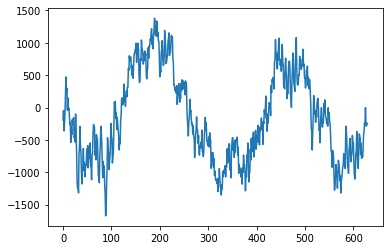

In [18]:
## import wave for reading and displaying .wav file
import wave
import numpy as np
signal_wave = wave.open('example.wav', 'r')
sample_rate = 22050
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
plot = plt.subplot()
plot.plot(sig[50:680])
plt.show()

##### Literature Explored
The most common feature for audio processing is an mel-frequency cepstrum (MFCC). The MFCC is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

MFCCs are commonly derived as follows:
1. Take the Fourier transform of (a windowed excerpt of) a signal.
2. Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
3. Take the logs of the powers at each of the mel frequencies.
4. Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
5. The MFCCs are the amplitudes of the resulting spectrum.

Below is an MFCC that represents the sound created by a foot fall.

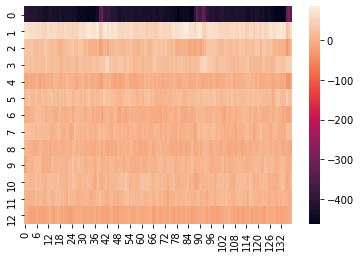

In [19]:
# import librosa by typing "conda install -c conda-forge librosa" into anaconda prompt
# librosa is an audio and music processing package
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
y, sr = librosa.load('example.wav', duration=1)
n_mfcc = 13
n_fft = 512
hop_length = 160
sr = 16000
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft, n_mfcc=n_mfcc, hop_length=hop_length)
sns.heatmap(mfcc)

MFCCs are used to caputre timbral/textural aspcets of sound, they have a frequency domain feature, they better approximate how humans hear, and they can be calculated at each frame. However, footsteps are a percussive sound, and the use of MFCCs will not as applicable as a genre classification algorithm.

For more information on the use of MFCCs visit:
https://www.youtube.com/c/ValerioVelardoTheSoundofAI/featured

For an implementation of a neural network for music genre classification using MFCCs visit:
https://github.com/ethanharvey98/COMP370-MusicGenreClassification